<a href="https://colab.research.google.com/github/anu-mohan/Ds_pythoncode/blob/main/Multi_Linear_Toyotta_coralla_(Anisha_Mohan).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Toyotta Corolla

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/content/ToyotaCorolla.csv',encoding= 'unicode_escape')
df = df.drop(['Id','Model','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Cylinders','Mfr_Guarantee','BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1','Airbag_2','Airco','Automatic_airco','Boardcomputer','CD_Player','Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette','Tow_Bar'],axis=1)
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [3]:
df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [4]:
df.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [5]:
df.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


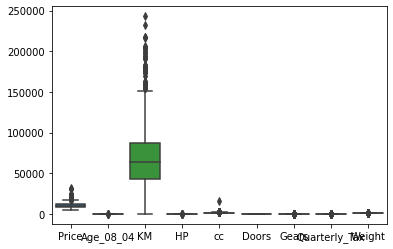

In [6]:
sns.boxplot(data=df,orient=False)

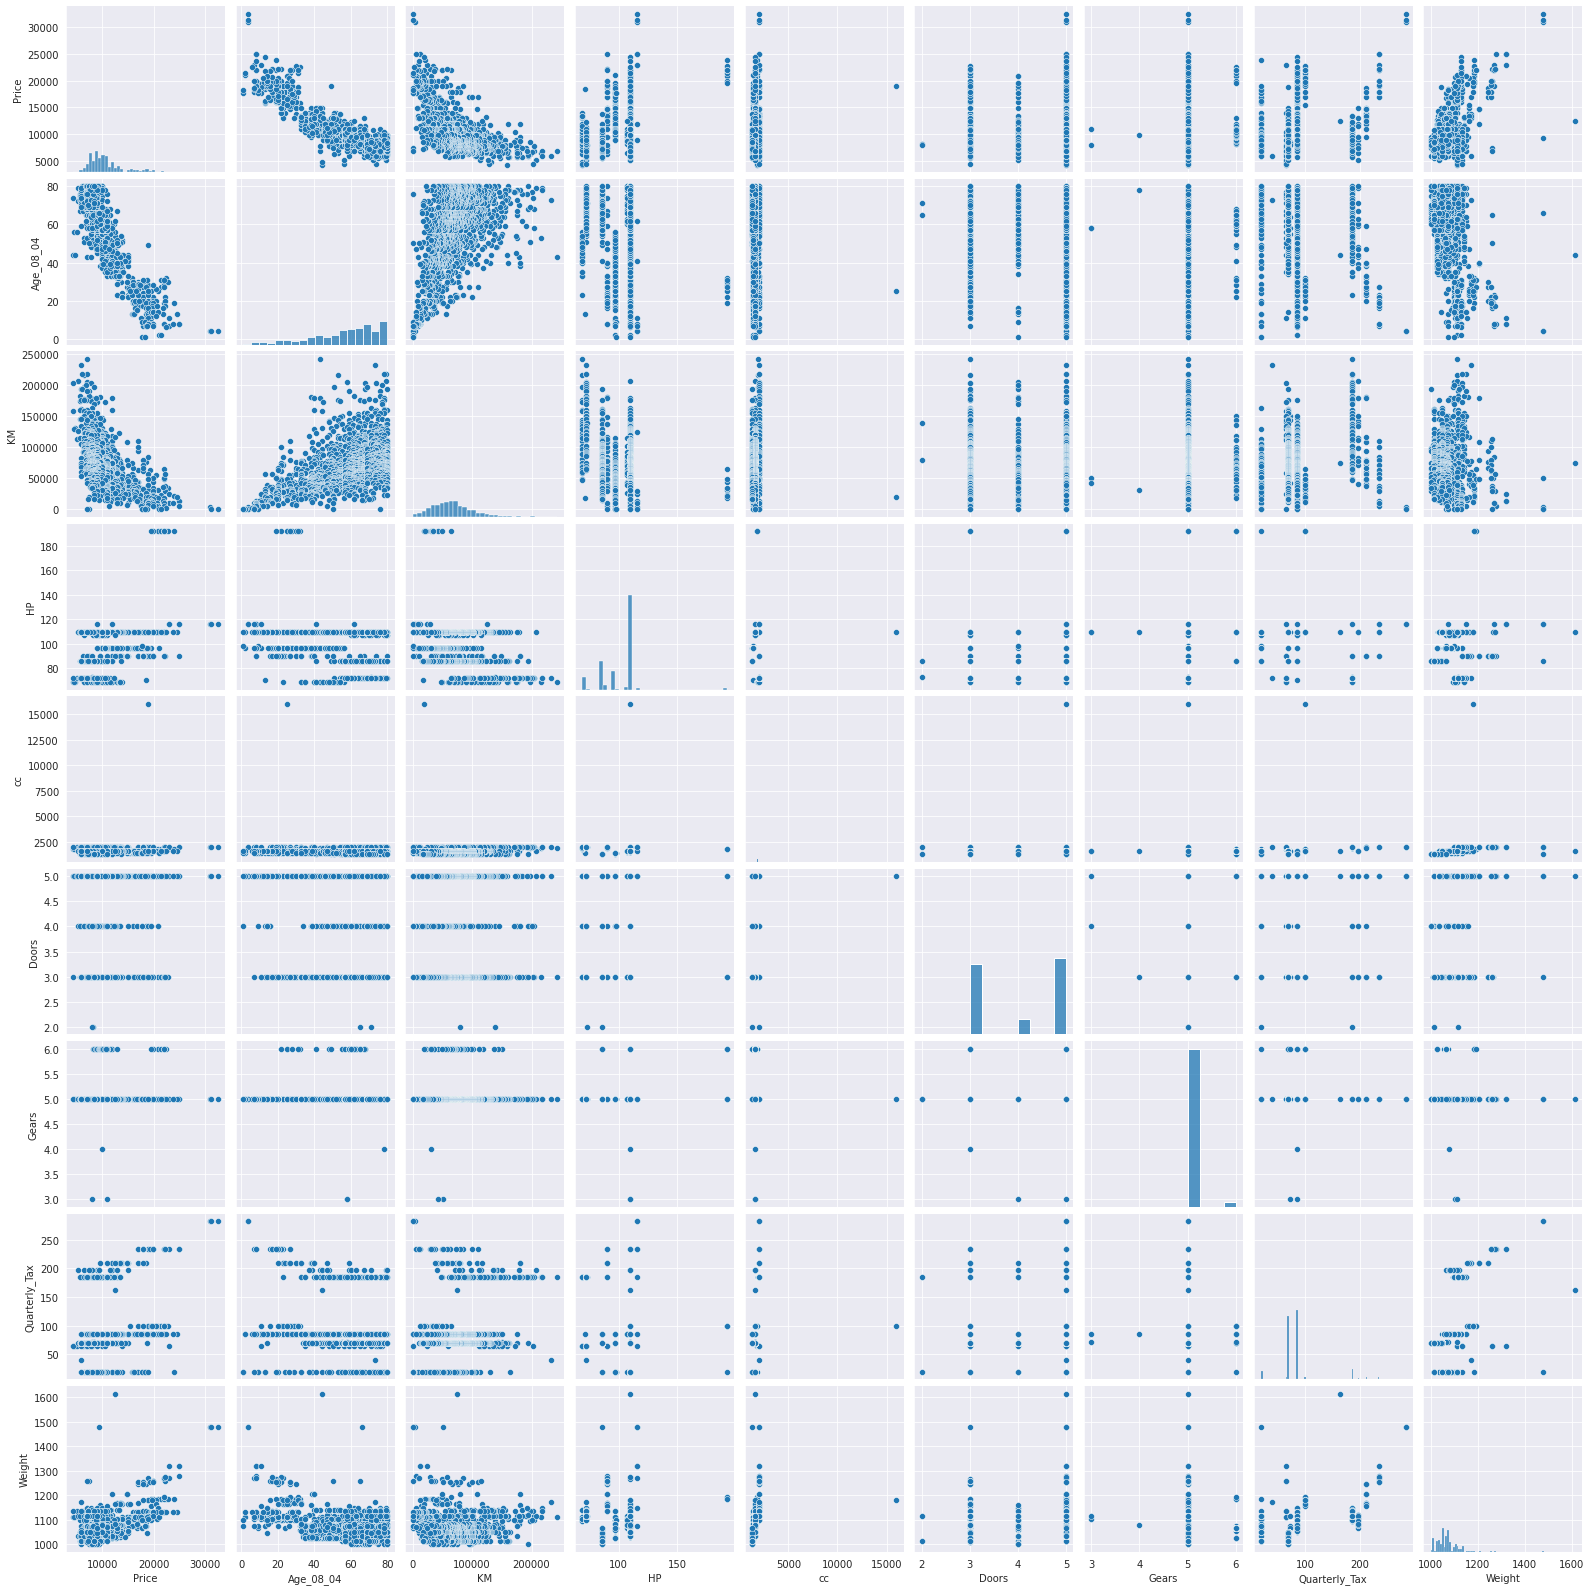

In [7]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [8]:
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit()

In [9]:
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [10]:
model.tvalues,model.pvalues

(Intercept        -3.948666
 Age_08_04       -46.511852
 KM              -16.621622
 HP               11.241018
 cc               -1.344222
 Doors            -0.040410
 Gears             3.016007
 Quarterly_Tax     3.014535
 Weight           15.879803
 dtype: float64, Intercept         8.241949e-05
 Age_08_04        3.354724e-288
 KM                7.538439e-57
 HP                3.757218e-28
 cc                1.790902e-01
 Doors             9.677716e-01
 Gears             2.606549e-03
 Quarterly_Tax     2.619148e-03
 Weight            2.048576e-52
 dtype: float64)

Making Individual Regression Model

In [11]:
m1_age = smf.ols('Price~Age_08_04',data=df).fit()
m1_km = smf.ols('Price~KM',data=df).fit()
m1_hp = smf.ols('Price~Age_08_04',data=df).fit()
m1_cc = smf.ols('Price~cc',data=df).fit()
m1_doors = smf.ols('Price~Doors',data=df).fit()
m1_gears = smf.ols('Price~Gears',data=df).fit()
m1_QT = smf.ols('Price~Quarterly_Tax',data=df).fit()
m1_wt = smf.ols('Price~Weight',data=df).fit()
m1_age.pvalues,m1_km.pvalues,m1_hp.pvalues,m1_cc.pvalues,m1_doors.pvalues,m1_gears.pvalues,m1_QT.pvalues,m1_wt.pvalues

(Intercept    0.0
 Age_08_04    0.0
 dtype: float64, Intercept     0.000000e+00
 KM           1.757913e-124
 dtype: float64, Intercept    0.0
 Age_08_04    0.0
 dtype: float64, Intercept    1.766912e-112
 cc            1.550808e-06
 dtype: float64, Intercept    1.094732e-73
 Doors        1.461237e-12
 dtype: float64, Intercept    0.069804
 Gears        0.016775
 dtype: float64, Intercept        1.532168e-246
 Quarterly_Tax     4.407393e-17
 dtype: float64, Intercept     1.739508e-80
 Weight       1.630487e-130
 dtype: float64)

Calculating VIF

In [12]:
rsq_Age = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared
rsq_km = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared
rsq_hp = smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared
rsq_cc = smf.ols('cc~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared
rsq_doors = smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared
rsq_gears = smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=df).fit().rsquared
rsq_QT = smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=df).fit().rsquared
rsq_wt = smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=df).fit().rsquared
vif_Age = 1/(1-rsq_Age)
vif_km = 1/(1-rsq_km)
vif_hp = 1/(1-rsq_hp)
vif_cc = 1/(1-rsq_cc)
vif_doors = 1/(1-rsq_doors)
vif_gears = 1/(1-rsq_gears)
vif_QT = 1/(1-rsq_QT)
vif_wt = 1/(1-rsq_wt)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


In [13]:
df1 = {'Variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_Age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_QT,vif_wt]}
vif_frame = pd.DataFrame(df1)
vif_frame

,Variables,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,inf
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


Residual Analysis

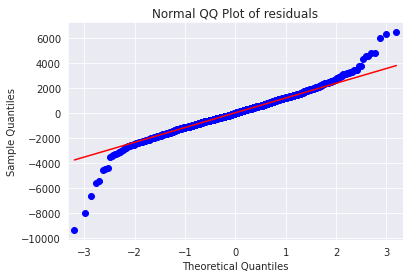

In [14]:
qqplot = sm.qqplot(model.resid,line = 'q')
plt.title("Normal QQ Plot of residuals")
plt.show()

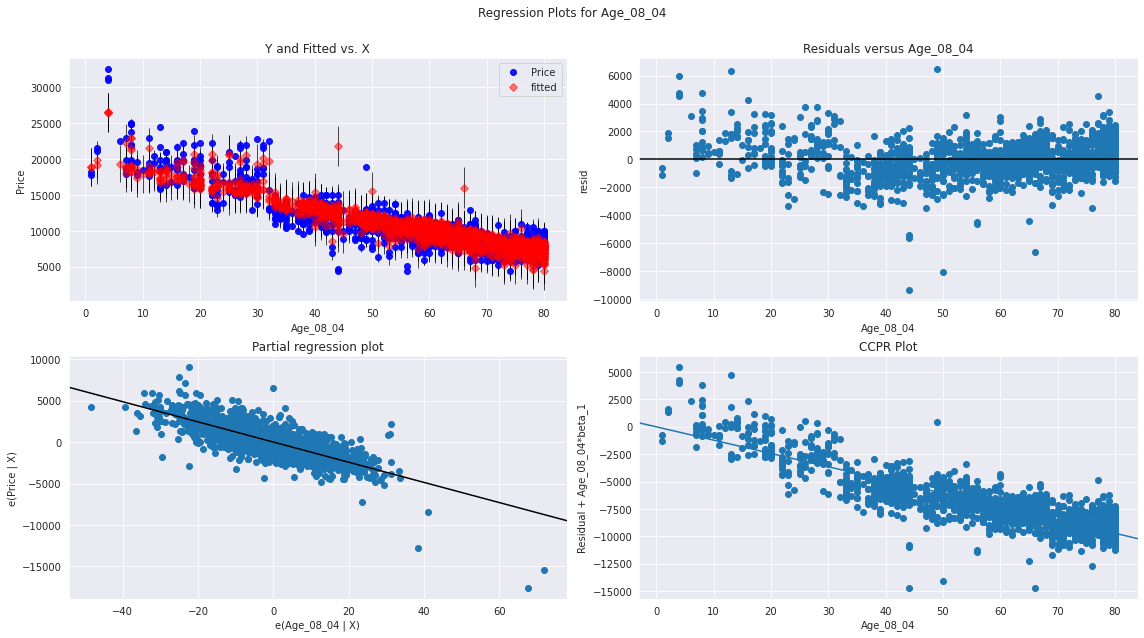

In [15]:
fig = plt.figure(figsize=(16,9))
fig = sm.graphics.plot_regress_exog(model,"Age_08_04",fig=fig)
plt.show()

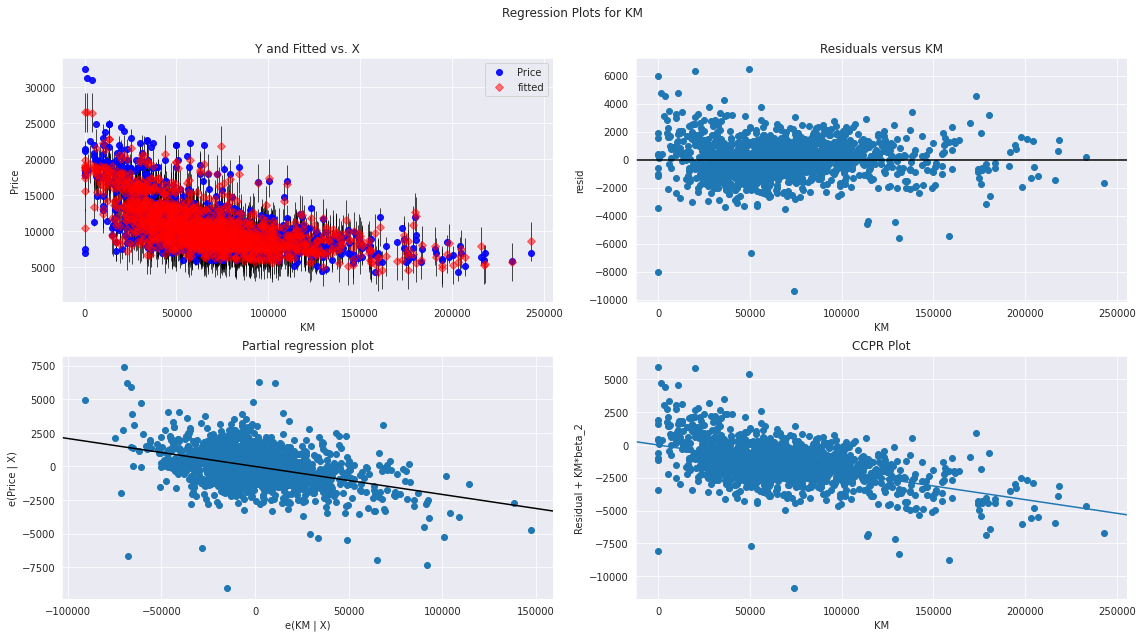

In [16]:
fig = plt.figure(figsize=(16,9))
fig = sm.graphics.plot_regress_exog(model,"KM",fig=fig)
plt.show()

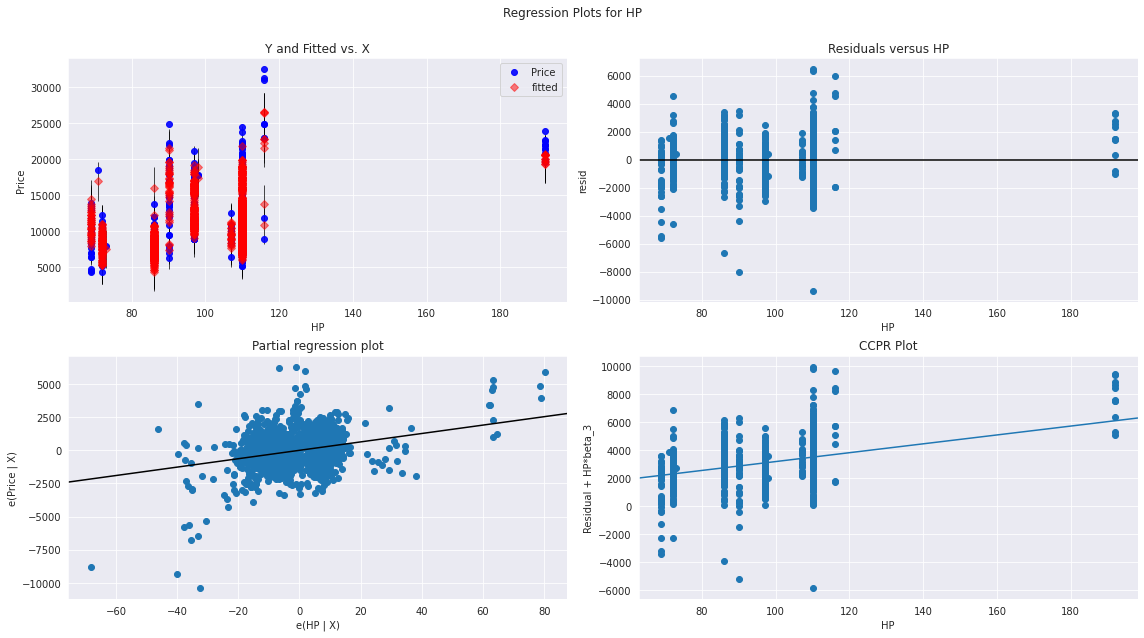

In [17]:
fig = plt.figure(figsize=(16,9))
fig = sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()

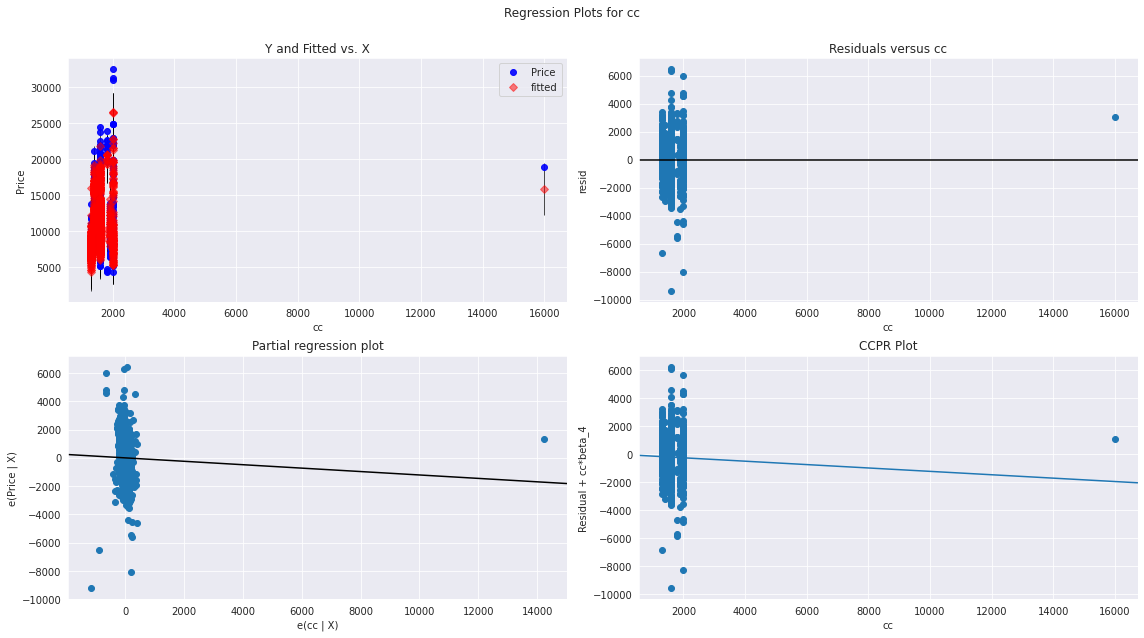

In [18]:
fig = plt.figure(figsize=(16,9))
fig = sm.graphics.plot_regress_exog(model,"cc",fig=fig)
plt.show()

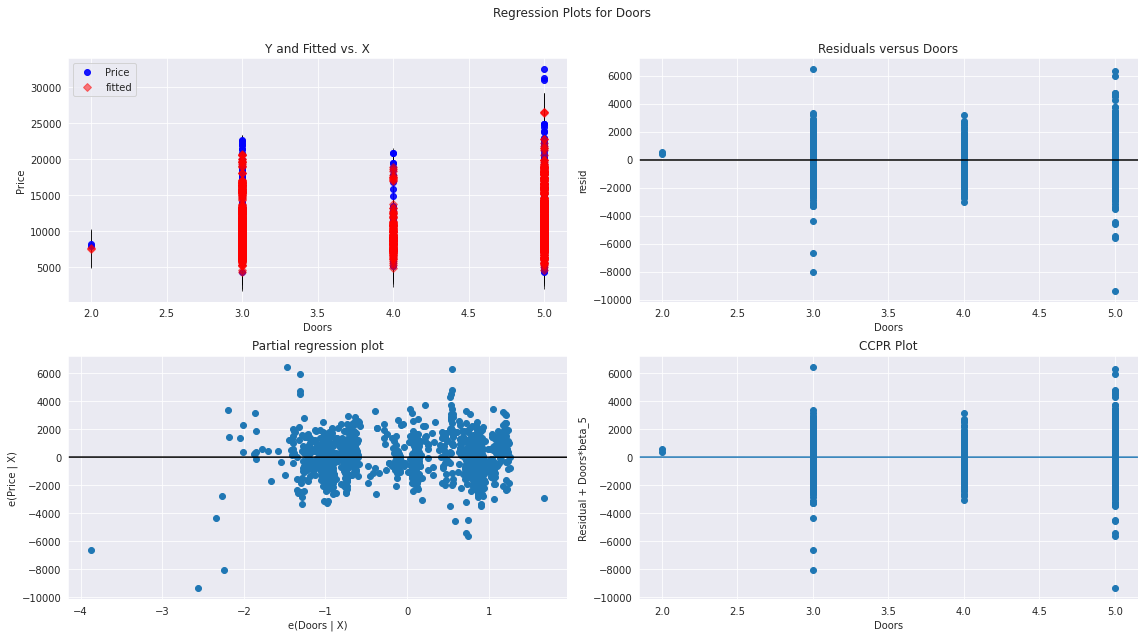

In [19]:
fig = plt.figure(figsize=(16,9))
fig = sm.graphics.plot_regress_exog(model,"Doors",fig=fig)
plt.show()

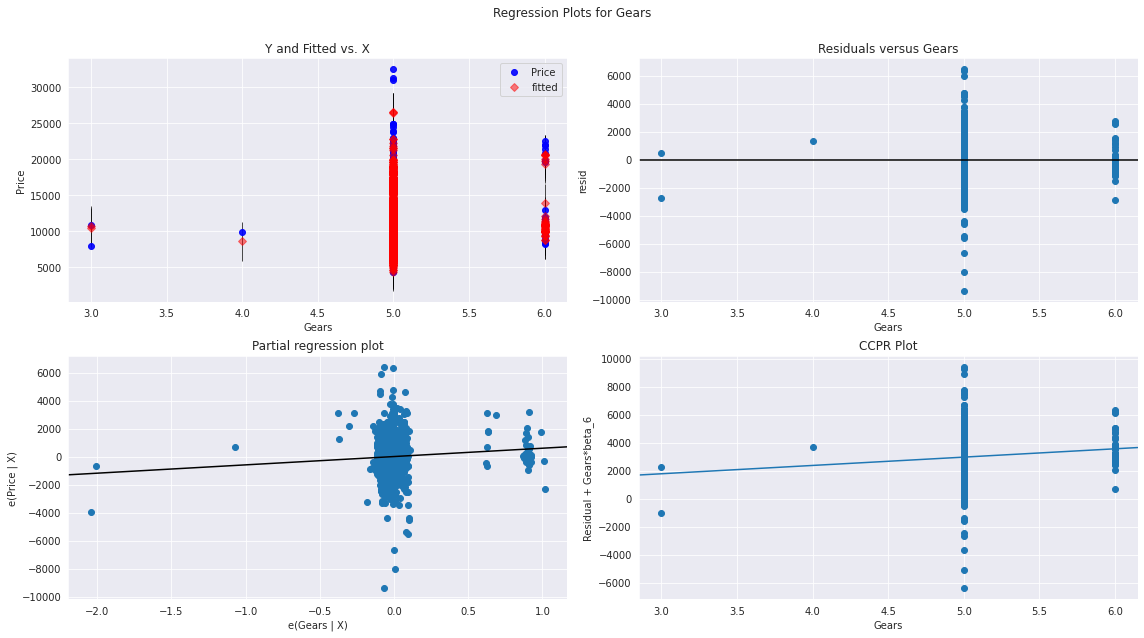

In [20]:
fig = plt.figure(figsize=(16,9))
fig = sm.graphics.plot_regress_exog(model,"Gears",fig=fig)
plt.show()

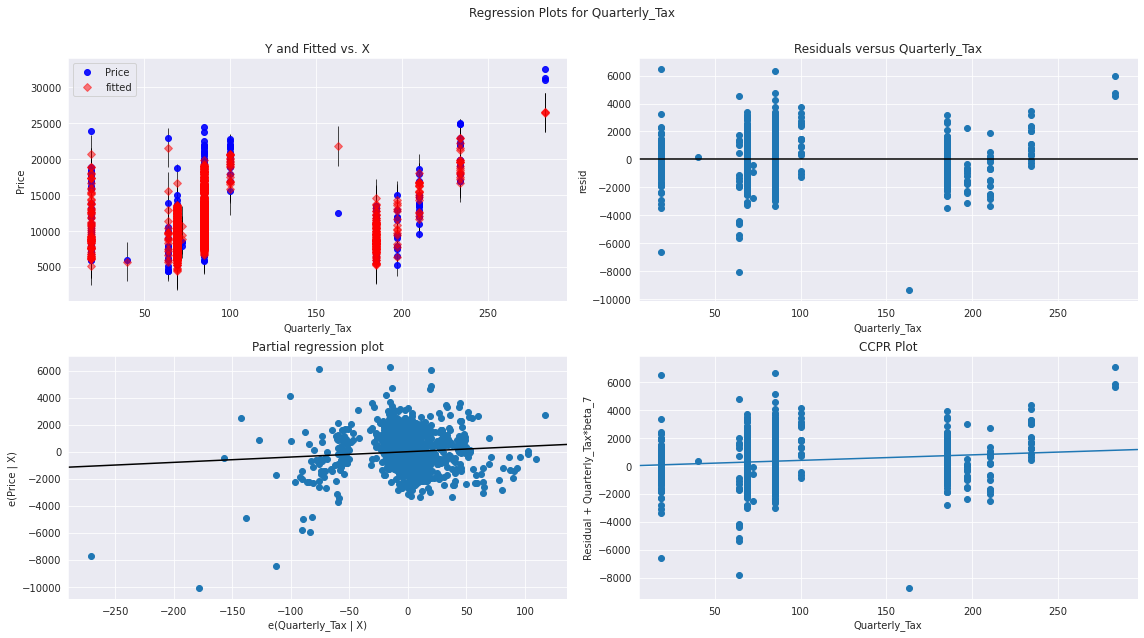

In [21]:
fig = plt.figure(figsize=(16,9))
fig = sm.graphics.plot_regress_exog(model,"Quarterly_Tax",fig=fig)
plt.show()

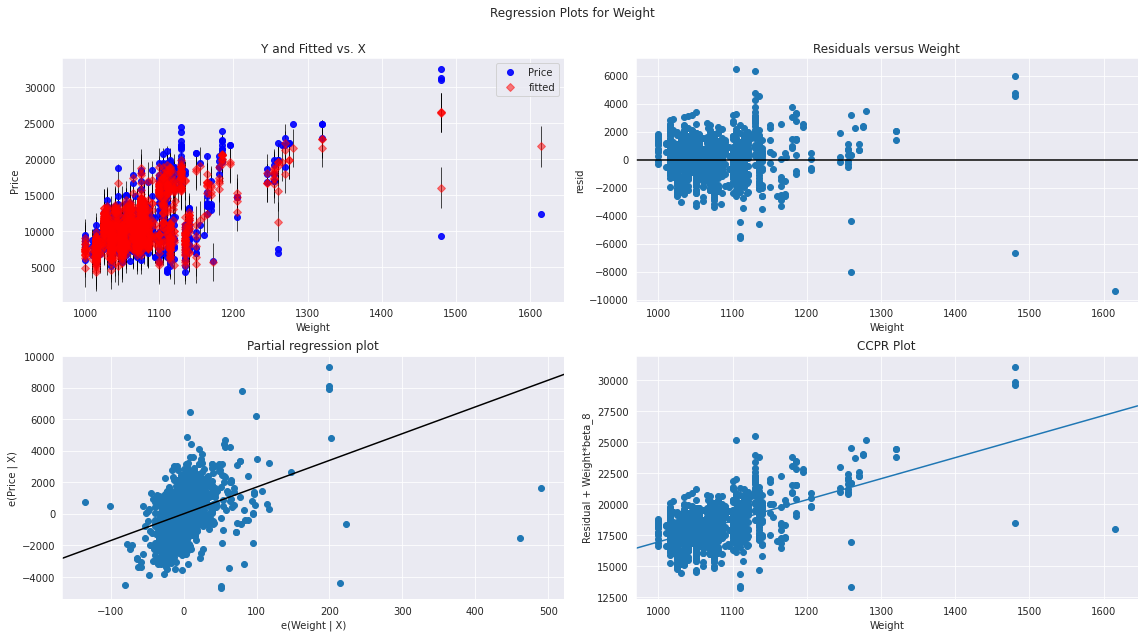

In [22]:
fig = plt.figure(figsize=(16,9))
fig = sm.graphics.plot_regress_exog(model,"Weight",fig=fig)
plt.show()

# Model Deletion Diagnostics

In [23]:
model_influence = model.get_influence()
(c,x) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


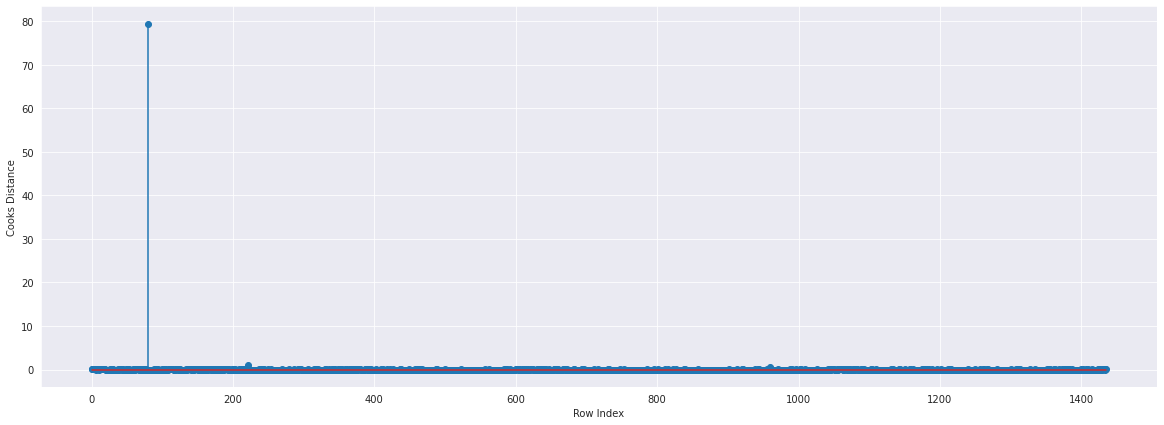

In [24]:
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

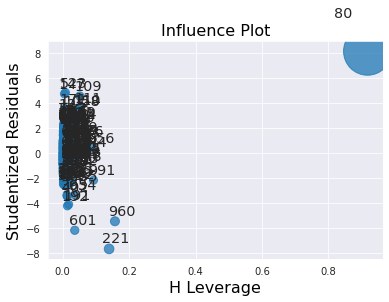

In [25]:
influence_plot(model)
plt.show()

In [26]:
data_new = df.drop(df.index[[80]],axis=0).reset_index()
data_new = data_new.drop(['index'],axis=1)

final_model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data_new).fit()
finalmodelwt = final_model.rsquared

new_data = pd.DataFrame({'Age_08_04':26,'KM':48000,'HP':90,'cc':2000,'Doors':3,'Gears':5,'Quarterly_Tax':210,'Weight':1165},index=[1])
predictwt = final_model.predict(new_data)

In [27]:
final_model.params

Intercept       -6284.740060
Age_08_04        -120.455049
KM                 -0.017849
HP                 39.346295
cc                 -2.524177
Doors             -27.228488
Gears             523.941556
Quarterly_Tax       9.043968
Weight             20.165459
dtype: float64

In [28]:
predictwt

1    16149.527067
dtype: float64

In [29]:
finalmodelwt

0.8693790488655818

# With Transformation

In [31]:
df = pd.read_csv('/content/ToyotaCorolla.csv',encoding= 'unicode_escape')
df = df.drop(['Id','Model','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Cylinders','Mfr_Guarantee','BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1','Airbag_2','Airco','Automatic_airco','Boardcomputer','CD_Player','Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette','Tow_Bar'],axis=1)
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# Standardization

In [32]:
df.iloc[:,:] = StandardScaler().fit_transform(df.iloc[:,:])
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.763763,-1.771966,-0.574695,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.758561
1,0.832715,-1.771966,0.117454,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.758561
2,0.887877,-1.718184,-0.715386,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.758561
3,1.163685,-1.610620,-0.547650,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.758561
4,0.832715,-1.395491,-0.801028,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.853577


In [33]:
df.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


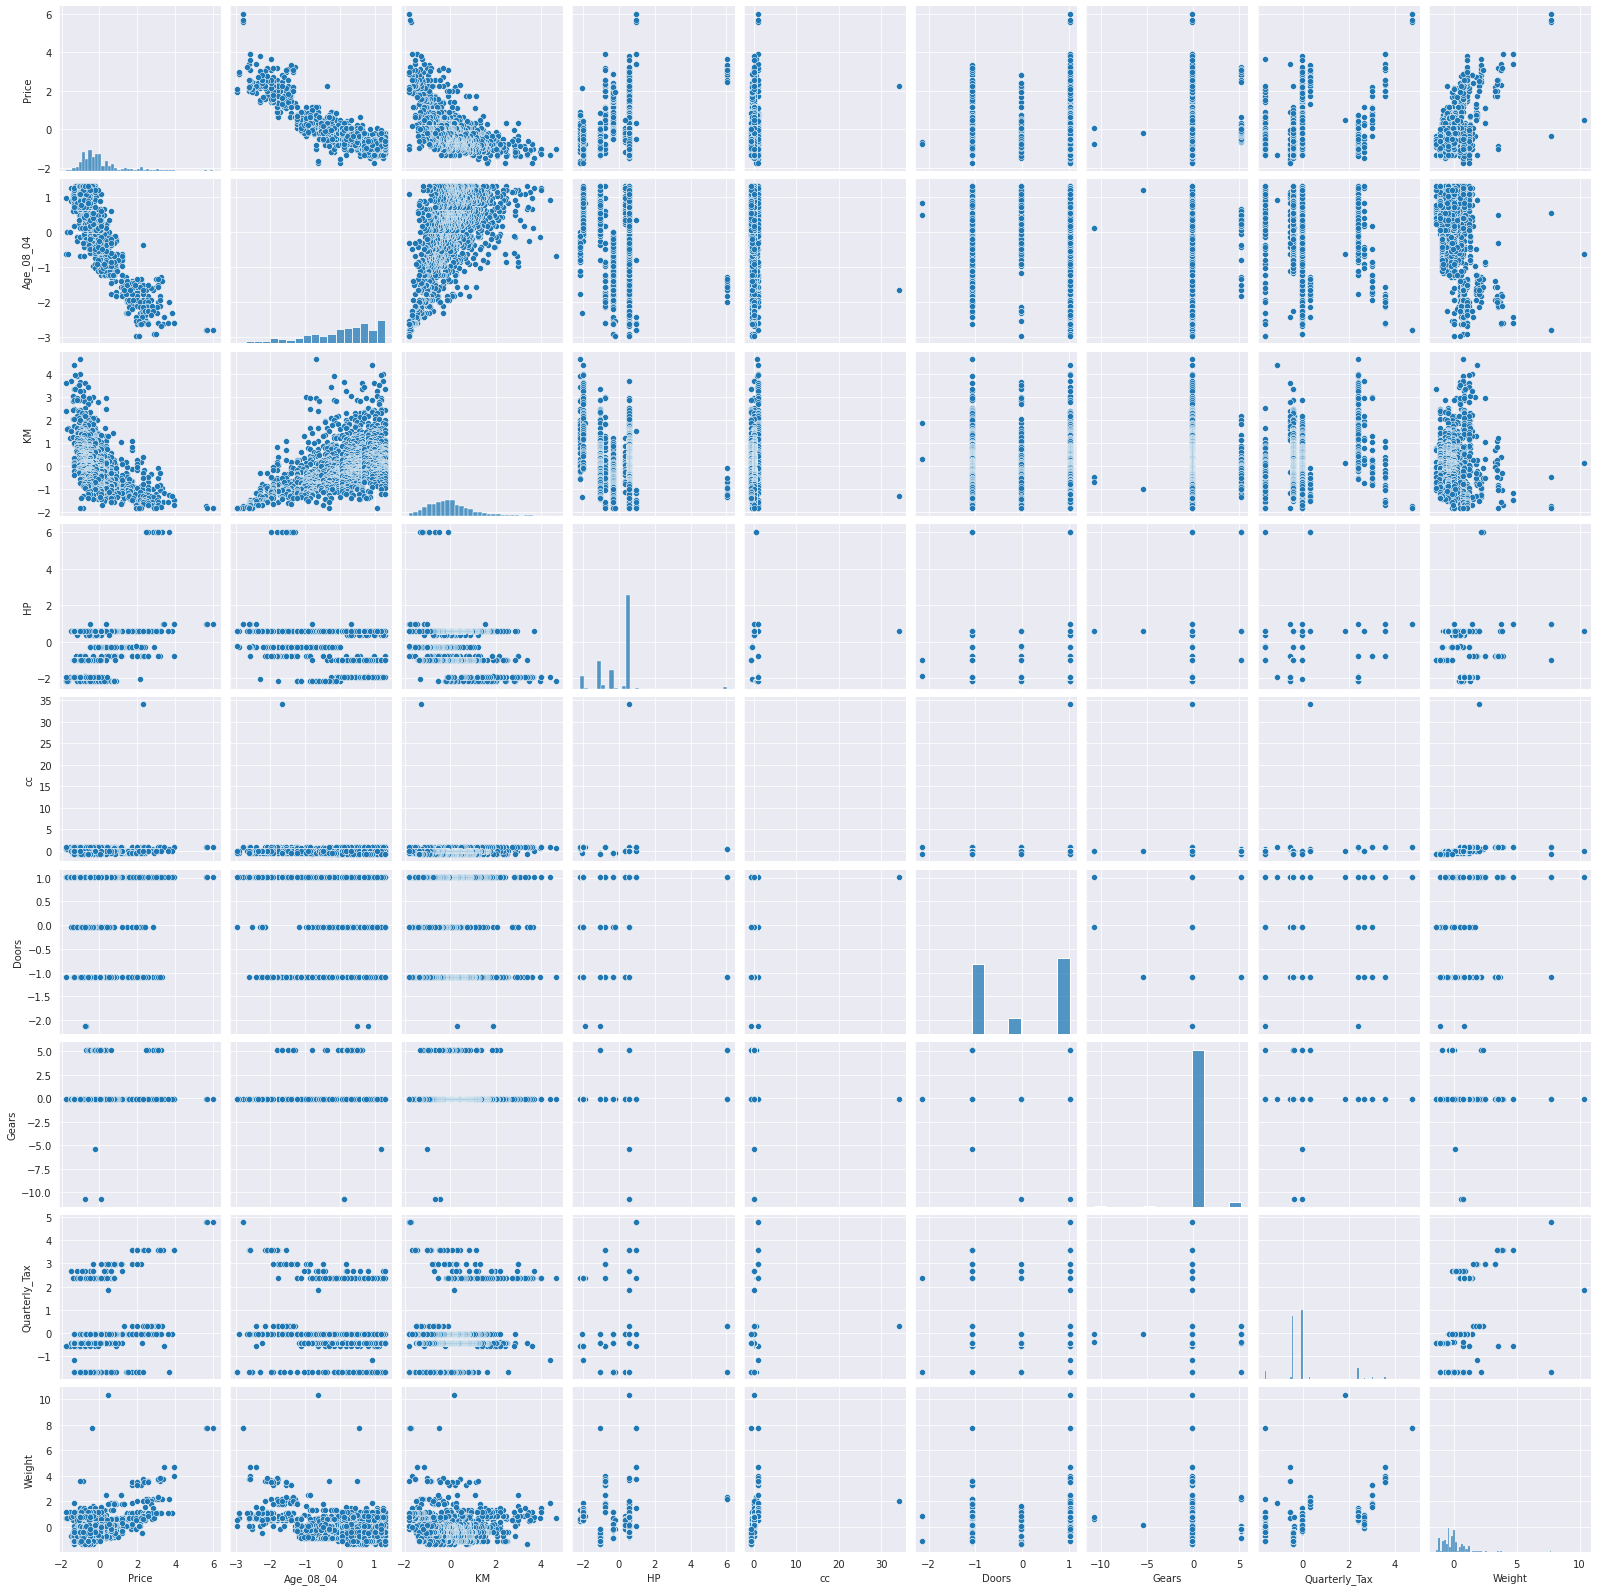

In [34]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

# Build Model

In [35]:
model1 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit()

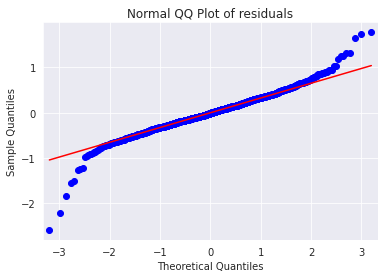

In [36]:
qqplot = sm.qqplot(model1.resid,line = 'q')
plt.title("Normal QQ Plot of residuals")
plt.show()

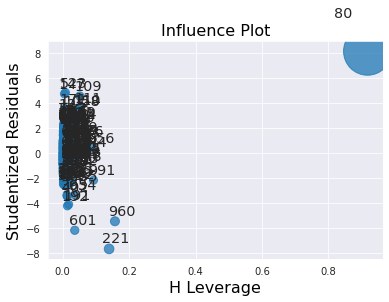

In [37]:
influence_plot(model1)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


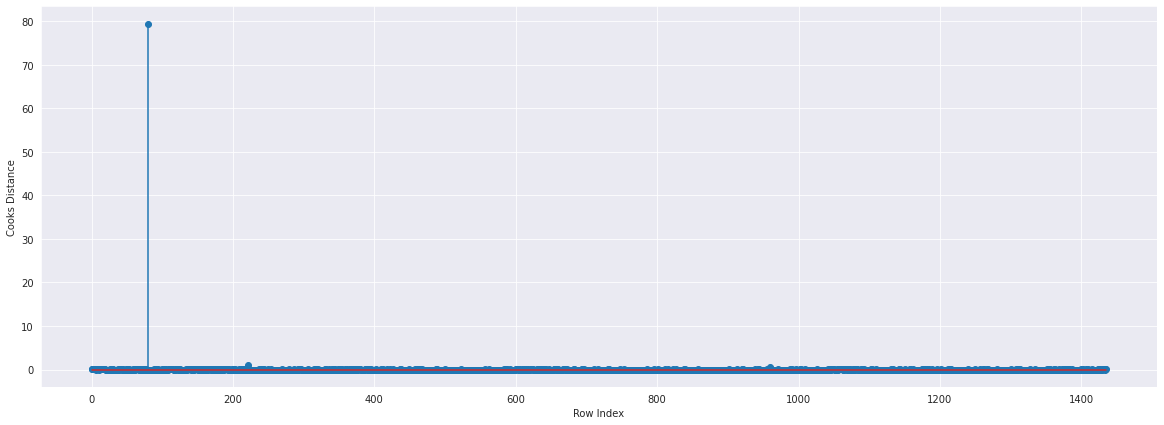

In [38]:
model_influence = model1.get_influence()
(c,x) = model_influence.cooks_distance

fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [39]:
data_new = df.drop(df.index[[80]],axis=0).reset_index()
data_new = data_new.drop(['index'],axis=1)
final_model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data_new).fit()
finalmodel1 = final_model.rsquared
new_data = pd.DataFrame({'Age_08_04':26,'KM':48000,'HP':90,'cc':2000,'Doors':3,'Gears':5,'Quarterly_Tax':210,'Weight':1165},index=[1])
predict1 = final_model.predict(new_data)

In [40]:
final_model.params

Intercept       -0.007198
Age_08_04       -0.617724
KM              -0.184572
HP               0.162519
cc              -0.295351
Doors           -0.007152
Gears            0.027232
Quarterly_Tax    0.102556
Weight           0.292678
dtype: float64

In [41]:
finalmodel1

0.8693790488655818

# Quantile Transformation

In [42]:
df = pd.read_csv('/content/ToyotaCorolla.csv',encoding= 'unicode_escape')
df = df.drop(['Id','Model','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Cylinders','Mfr_Guarantee','BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1','Airbag_2','Airco','Automatic_airco','Boardcomputer','CD_Player','Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette','Tow_Bar'],axis=1)
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [43]:
qt = QuantileTransformer(random_state=0)
qtdf = qt.fit_transform(df)
qtdf = qt.transform(df)
df_qtdata = pd.DataFrame(data=qtdf, columns=['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'])
df_qtdata.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.847848,0.080080,0.294745,0.261762,0.958458,0.217718,0.486486,0.978478,0.958959
1,0.855355,0.080080,0.606682,0.261762,0.958458,0.217718,0.486486,0.978478,0.958959
2,0.862863,0.083584,0.241271,0.261762,0.958458,0.217718,0.486486,0.978478,0.958959
3,0.878378,0.093093,0.308308,0.261762,0.958458,0.217718,0.486486,0.978478,0.958959
4,0.855355,0.118118,0.209444,0.261762,0.958458,0.217718,0.486486,0.978478,0.963463


In [44]:
df_qtdata.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.841163,-0.615641,0.235702,0.147965,0.208832,0.076067,0.319276,0.415732
Age_08_04,-0.841163,1.000000,0.530927,-0.091719,-0.140818,-0.139092,-0.023353,-0.271365,-0.381465
KM,-0.615641,0.530927,1.000000,-0.205464,0.157477,-0.042996,0.019724,0.024733,-0.063968
HP,0.235702,-0.091719,-0.205464,1.000000,0.400790,0.147308,0.136519,0.062939,0.169269
cc,0.147965,-0.140818,0.157477,0.400790,1.000000,0.152336,0.071749,0.520287,0.691025
Doors,0.208832,-0.139092,-0.042996,0.147308,0.152336,1.000000,-0.160334,0.366041,0.460565
Gears,0.076067,-0.023353,0.019724,0.136519,0.071749,-0.160334,1.000000,0.100044,0.015954
Quarterly_Tax,0.319276,-0.271365,0.024733,0.062939,0.520287,0.366041,0.100044,1.000000,0.713740
Weight,0.415732,-0.381465,-0.063968,0.169269,0.691025,0.460565,0.015954,0.713740,1.000000


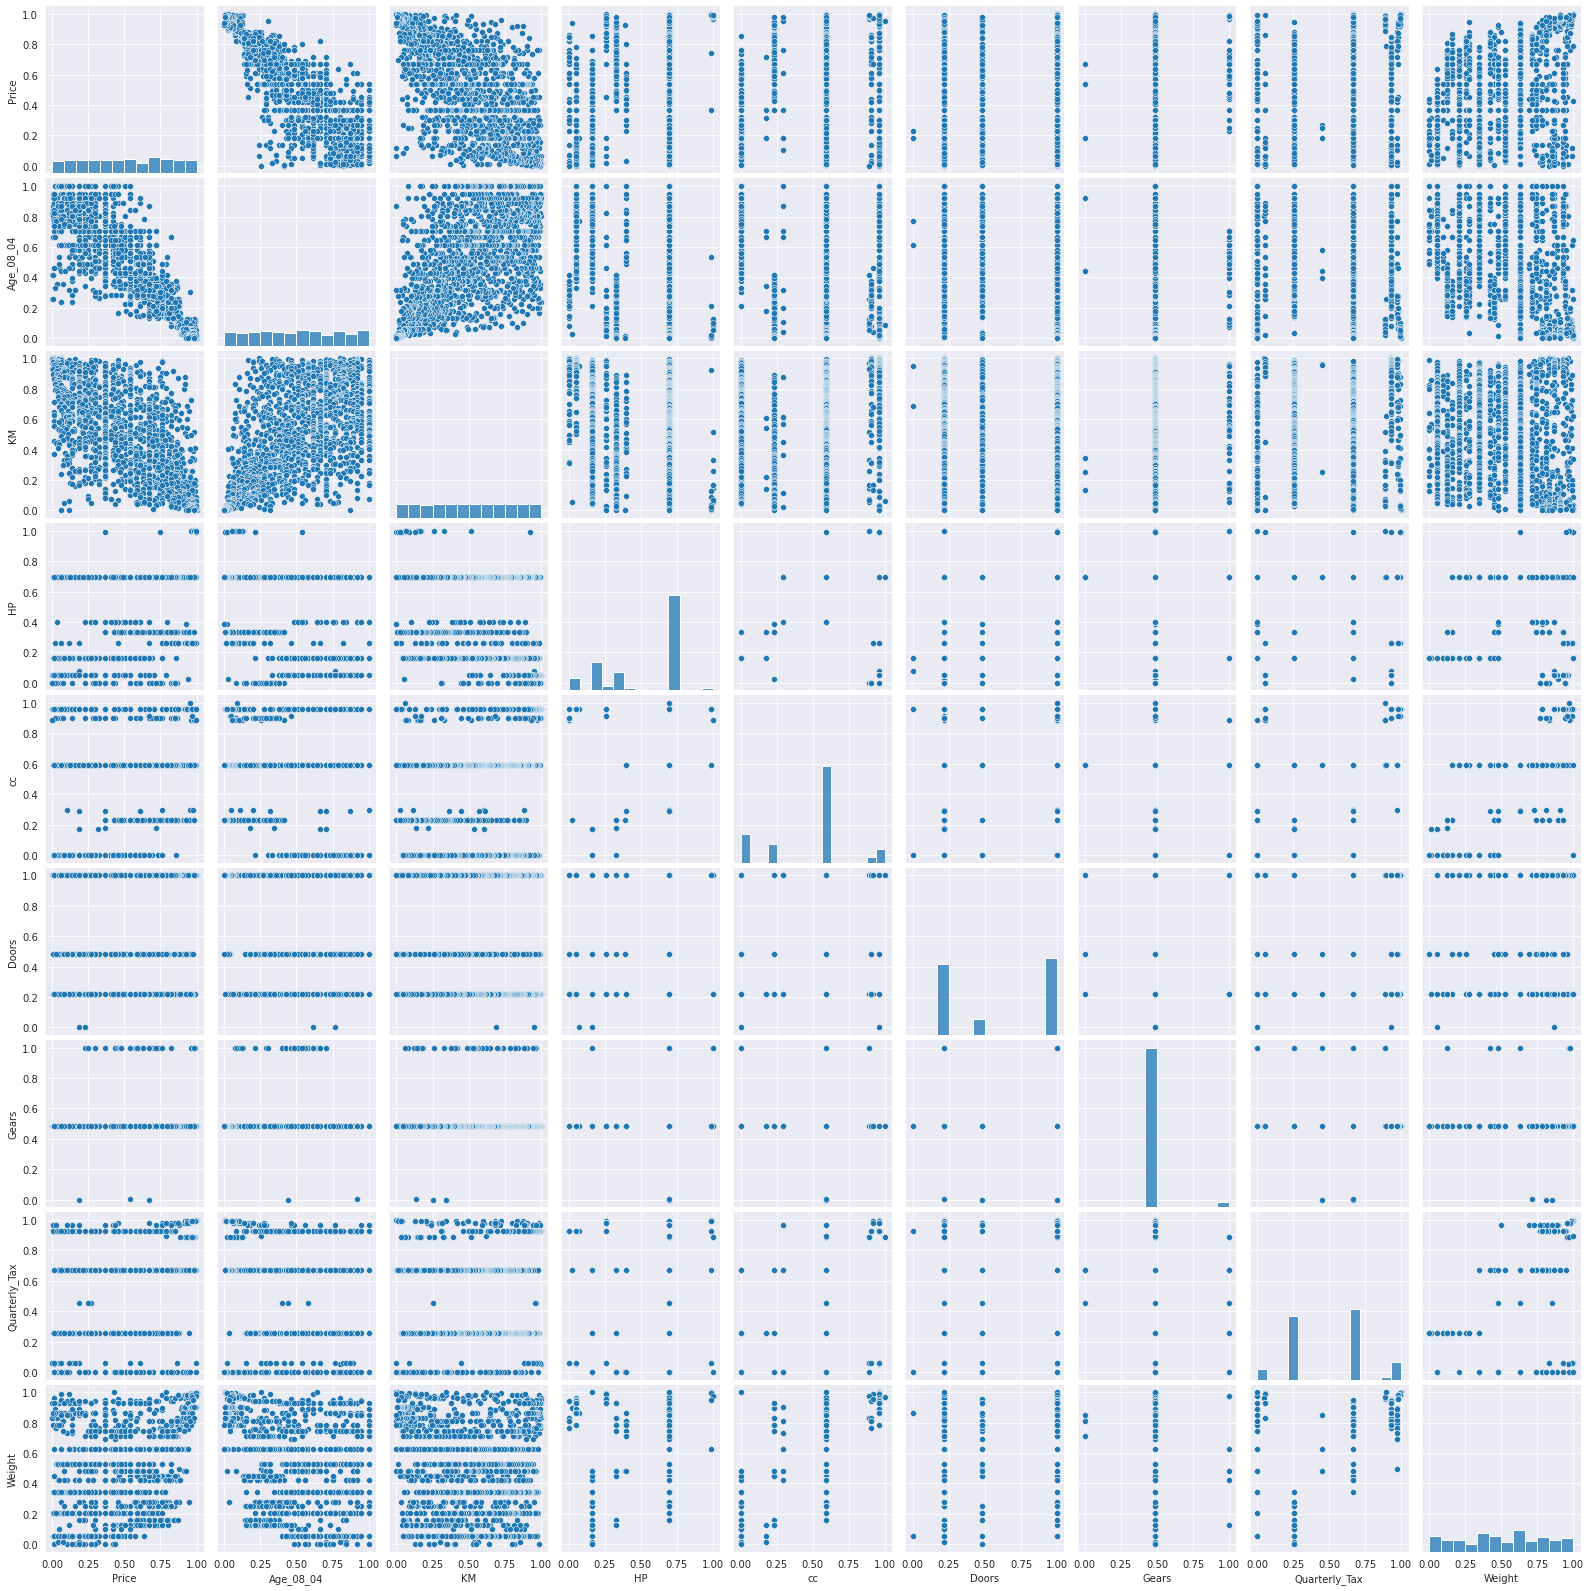

In [45]:
sns.set_style(style='darkgrid')
sns.pairplot(df_qtdata)

# Build Model

In [46]:
x = df_qtdata.iloc[:,1:]
y = df_qtdata.iloc[:,0]

In [47]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred3 = model.predict(X_test)

r2scorewt3 = r2_score(y_test,y_pred3)

In [48]:
r2scorewt3

0.7682626344271929

# Normalizer

In [50]:
df = pd.read_csv('/content/ToyotaCorolla.csv',encoding= 'unicode_escape')
df = df.drop(['Id','Model','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Cylinders','Mfr_Guarantee','BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1','Airbag_2','Airco','Automatic_airco','Boardcomputer','CD_Player','Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette','Tow_Bar'],axis=1)
data=df

In [51]:
n = Normalizer()
ndf = n.fit_transform(data)
ndf = n.transform(data)
df_ndata = pd.DataFrame(data=ndf,columns=['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'])
df_ndata.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.275835,0.000470,0.960029,0.001839,0.040864,0.000061,0.000102,0.004291,0.023804
1,0.185165,0.000310,0.982208,0.001212,0.026933,0.000040,0.000067,0.002828,0.015689
2,0.316733,0.000545,0.947043,0.002043,0.045410,0.000068,0.000114,0.004768,0.026451
3,0.297051,0.000517,0.953742,0.001788,0.039739,0.000060,0.000099,0.004173,0.023148
4,0.335792,0.000733,0.940218,0.002198,0.048842,0.000073,0.000122,0.005128,0.028573


In [52]:
df_ndata.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,0.186625,-0.888243,0.893448,0.751821,0.856173,0.883359,0.789040,0.902992
Age_08_04,0.186625,1.000000,-0.082087,0.539847,0.441524,0.476069,0.588699,0.214197,0.552524
KM,-0.888243,-0.082087,1.000000,-0.751177,-0.662833,-0.746328,-0.745608,-0.669261,-0.780678
HP,0.893448,0.539847,-0.751177,1.000000,0.808352,0.900020,0.972033,0.686090,0.969205
cc,0.751821,0.441524,-0.662833,0.808352,1.000000,0.759319,0.814037,0.644360,0.826760
Doors,0.856173,0.476069,-0.746328,0.900020,0.759319,1.000000,0.911526,0.680565,0.919894
Gears,0.883359,0.588699,-0.745608,0.972033,0.814037,0.911526,1.000000,0.710611,0.992641
Quarterly_Tax,0.789040,0.214197,-0.669261,0.686090,0.644360,0.680565,0.710611,1.000000,0.749911
Weight,0.902992,0.552524,-0.780678,0.969205,0.826760,0.919894,0.992641,0.749911,1.000000


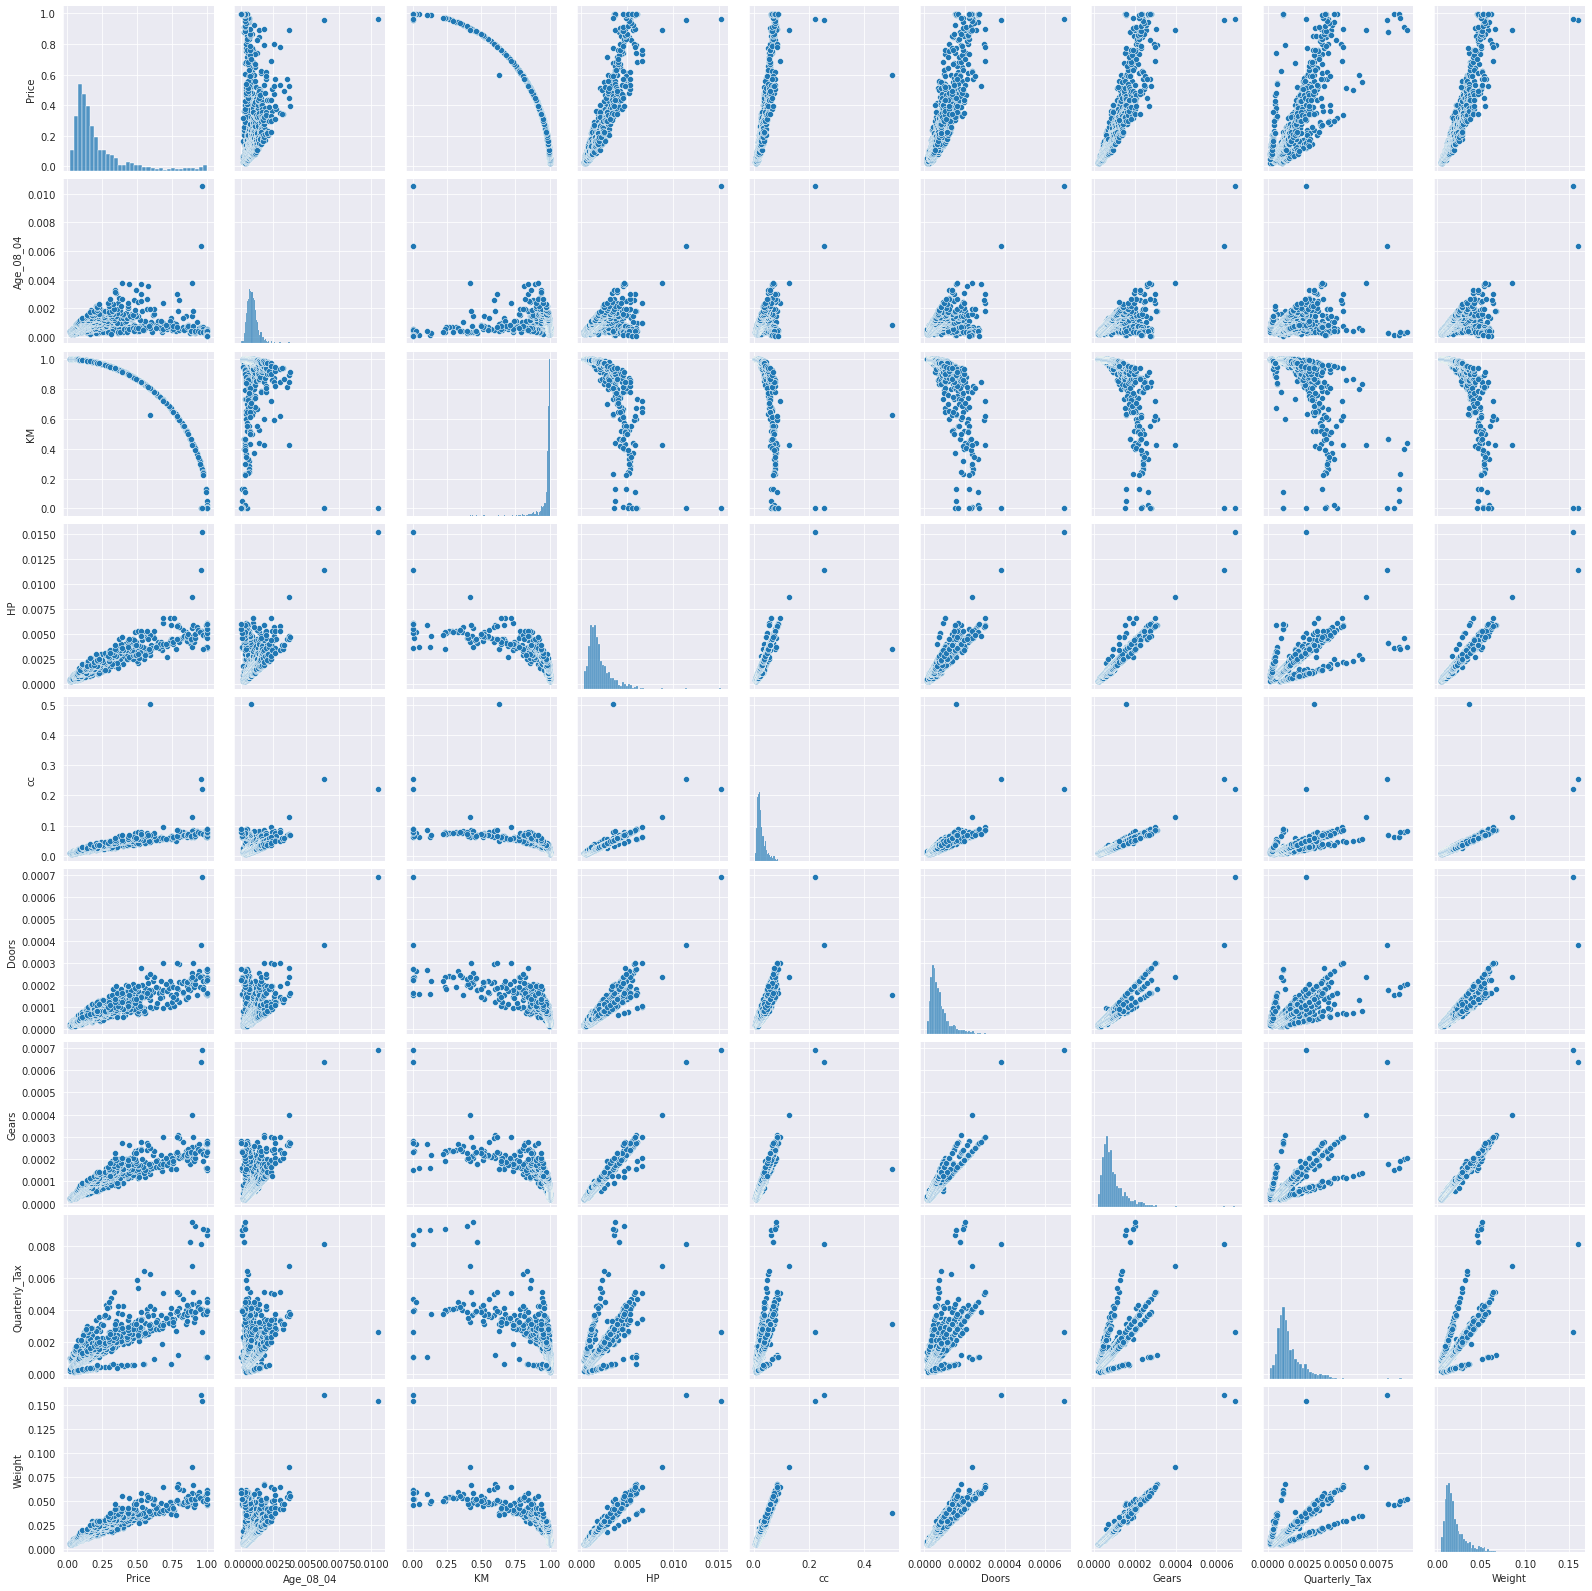

In [53]:
sns.set_style(style='darkgrid')
sns.pairplot(df_ndata)

# Build Model

In [54]:
x = df_ndata.iloc[:,1:]
y = df_ndata.iloc[:,0]

In [55]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred4 = model.predict(X_test)

r2scorewt4 = r2_score(y_test,y_pred4)

In [56]:
r2scorewt4

0.829904475678811

In [67]:
Analysis = {'Method':['OLS with Quantile Transformation','OLS with Normalization'],'R-Squared Values':[qt,ndf],'Predicted Value':[y_pred3,y_pred4]}
Analysis = pd.DataFrame(Analysis)

Analysis1 = {'Method':['Sklearn LR with Quantile Transformation','Sklearn LR with Normalization'],'R-Squared Values':[r2scorewt3,r2scorewt4],'Predicted Values':[y_pred3,y_pred4]}
Analysis1 = pd.DataFrame(Analysis1)

TotalAnalysis = pd.concat([Analysis,Analysis1],axis=1)
TotalAnalysis

,Method,R-Squared Values,Predicted Value,Method,R-Squared Values,Predicted Values
0,OLS with Quantile Transformation,"QuantileTransformer(copy=True, ignore_implicit...","[0.29594876874570836, 0.5360451036805962, 0.76...",Sklearn LR with Quantile Transformation,0.768263,"[0.29594876874570836, 0.5360451036805962, 0.76..."
1,OLS with Normalization,"[[0.27583527558920423, 0.00046994158063345904,...","[0.07957858225334388, 0.11093825935270238, 0.3...",Sklearn LR with Normalization,0.829904,"[0.07957858225334388, 0.11093825935270238, 0.3..."
